<a href="https://colab.research.google.com/github/Dennis826/Machine-learning/blob/master/Course01_02_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beyond Hello World, A Computer Vision Example**

**1. Start Code**

In [0]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


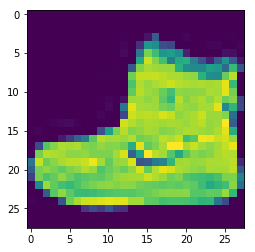

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

In [0]:
print(training_labels[0])

9


In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4980 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3799 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3388 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3123 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2945 - acc: 0.8918


In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3606 - acc: 0.8701


[0.3606139671325684, 0.8701]

In [0]:
classifications = model.predict(test_images)

print(test_labels[0])
print(classifications[0])

9
[4.56733596e-06 2.58587929e-09 5.41851762e-07 1.92221887e-06
 1.23076852e-05 5.59789650e-02 1.29991104e-05 1.21472985e-01
 4.78634000e-04 8.22037101e-01]


**2. Exploration Exercises**

(1) Modify the hidden layers to 512.

In [0]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

(2) Modify the hidden layers to 1024.

In [0]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

(3) Modify the output layers.

In [0]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(20, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

(4) Remove the normalization of  the data.

In [0]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

#training_images = training_images/255.0
#test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

(5)  Adding Callback to end the training when the loss under 0.3 rate. 

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.3):
      print("Loss is below 0.3 so canceling the training.")
      self.model.stop_training=True

In [0]:
callbacks=myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10,callbacks=[callbacks])

model.evaluate(test_images, test_labels)

Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4947 - acc: 0.8241
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3720 - acc: 0.8653
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3325 - acc: 0.8787
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3100 - acc: 0.8854
Epoch 5/10
10000/10000 [==============================] - 1s 52us/sample - loss: 0.3339 - acc: 0.8777


[0.3339277813434601, 0.8777]